### Academic honesty statement



**This is an exam problem. You are required to be in class to work on this. By turning this in you certify that it is your own work you did in class and you have not received any unauthorized assistance.**

Place your academic honesty statement here. Here are some acceptable examples.

-   I worked alone on this assignment.
-   I worked with <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_\_</span></span></span></span> on this assignment.”
-   I received assistance from <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_</span></span></span></span> on this assignment.



### Phase equilibria



In phase equilibria, the composition of two phases is determined by a common tangent construction. The Gibbs free energy of a solid and liquid of a mixture of species A and B is shown below as a function of the mole fraction of B.



# Out [21]:
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

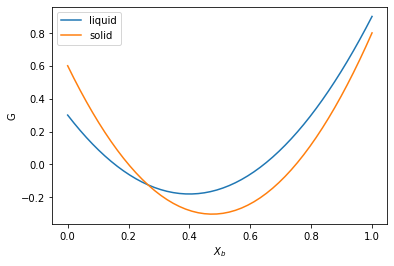

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Xb = np.linspace(0, 1)

def G_liquid(xb):
    xa = 1 - xb
    ga = 0.3
    gb = 0.9
    return  xa * ga + xb * gb - 3 * xa * xb

def G_solid(xb):
    ga = 0.6
    gb = 0.8
    xa = 1 - xb
    return  xa * ga + xb * gb - 4 * xa * xb


plt.plot(Xb, G_liquid(Xb), Xb, G_solid(Xb))
plt.legend(['liquid', 'solid'])
plt.xlabel('$X_b$')
plt.ylabel('G');

Under these conditions, the solid and liquid are in equilibrium. The slope at each point on each curve is related to the chemical potential of the phase at that point. The equilibrium is defined where the chemical potential of the liquid is equal to the chemical potential of the solid.

Find $x_{B,liquid}$ and $x_{B,solid}$ that satisfy the following equations:

$\frac{dG_{liquid}}{dx_B}\rvert_{x_{B,liquid}} = \frac{G_{liquid} - G_{solid}}{x_{B,liquid} - x_{B,solid}}$

and

$\frac{dG_{solid}}{dx_B}\rvert_{x_{B,solid}} = \frac{G_{liquid} - G_{solid}}{x_{B,liquid} - x_{B,solid}}$

The left hand side means the derivatives are evaluated at the point indicated. You can use any method to evaluate the derivatives you want.



Plot the common tangent line to show that it makes sense.



### solution



The key to this problem is setting up the equations that define the equality of the derivatives.



In [1]:
from scipy.misc import derivative

def objective(X):
    xliq, xsol = X
    yliq = G_liquid(xliq)
    ysol = G_solid(xsol)
    slope = (ysol - yliq) / (xsol - xliq)
    return [derivative(G_liquid, xliq, dx=1e-6) - slope,
            derivative(G_solid, xsol, dx=1e-6) - slope]

from scipy.optimize import fsolve

ans = fsolve(objective, [0.1, 0.4])
print(f'x_{{B,liq}} = {ans[0]:1.2f}, and x_{{B,sol}} = {ans[1]:1.2f}.')

# Out [26]:
# output
x_{B,liq} = 0.20, and x_{B,sol} = 0.32.

If we plot this, the line segment should be a common tangent.



# Out [27]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

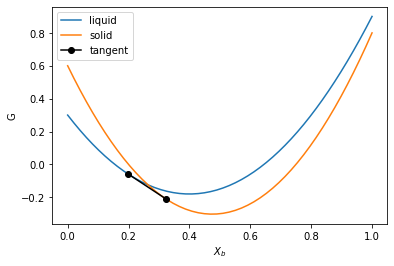

In [1]:
plt.plot(Xb, G_liquid(Xb), Xb, G_solid(Xb))
plt.xlabel('$X_b$')
plt.ylabel('G');
plt.plot(ans, [G_liquid(ans[0]), G_solid(ans[1])], 'ko-')
plt.legend(['liquid', 'solid', 'tangent'])